In [35]:
import ctypes
import time

### Part A3.1:  Access PMU from python

In [36]:
_libInC = ctypes.CDLL('./libMyCyLib.so')

In [37]:
_libInC.initialize_counters(1,0)

1

In [38]:
_libInC.get_cycle_count()

585761095

### Part A3.2: Comparing and Gathering Data

In this section, we are going to use psutil to monitor CPU usage in percent, and the time module and
PMU counting to evaluate the recursive fibonacci sequence timing operations.

In [39]:
# Program to calculate the Fibonacci sequence up to n-th term
nterms = int(input("How many terms? "))

#define shared libary
_libInC = ctypes.CDLL('./libMyCyLib.so')

#Initialize the cyclecounter
_libInC.initialize_counters(1,0)

#Get the 'before' time using python time module
before_time = time.time()

#Get the 'before' cycle count
before_cycle_count = _libInC.get_cycle_count()

#Run the recu_fibo function on CPU 1
def recur_fibo(n):
    if n <= 1:
       return n
    else:
       return(recur_fibo(n-1) + recur_fibo(n-2))

#Get the 'after' cycle count
after_cycle_count = _libInC.get_cycle_count()

#Get the 'after' time count cycle uisng the python time module
time_after = time.time()

#Get the cycle count 
cycle_count = after_cycle_count - before_cycle_count

#Get the amount of time used
time_used = time_after - before_time

# check if the number of terms is valid
if nterms <= 0:
   print("Please enter a positive integer")
else:
   recur_fibo(nterms)
        
tac = time.time()
print('time spent: {}'.format(time_used))

How many terms? 5
time spent: 0.0016863346099853516


### Calculate Error Standard Deviation

In [40]:
# Calculated average for n-term 5, 10, 15, 20 and 30 three times.  
import math
#calculation the standard deviation
err_n = float( .0081/math.sqrt(15))
print(err_n)

0.002091411006952005


### Plot Average Results of Varying N

In [41]:
import time
import pylab as pl
from IPython import display
import psutil
import matplotlib.pyplot as plt
import numpy as np

In [44]:
#Define recursive fibonnaci function
def recur_fibo(n):
    if n <= 1:
       return n
    else:
       return(recur_fibo(n-1) + recur_fibo(n-2))

In [45]:
#Holds amount of time used for values 1-30
nTime = []

#Holds cyclecount for values 1-30
nCount = []

#run Fibonnaci on values 1-30
for i in range(1,30,1):
    #Get the 'before' time using python time module
    before_time = time.time()
    
    #Initialize the cyclecounter
    _libInC.initialize_counters(1,0)

    #Get the 'before' cycle count
    before_cycle_count = _libInC.get_cycle_count()
    
    #Call fibonacci function
    fib_val = recur_fibo(i)
    
    
    #Get the 'after' cycle count
    after_cycle_count = _libInC.get_cycle_count()

    #Get the 'after' time count cycle uisng the python time module
    time_after = time.time()

    #Get the cycle count 
    cycle_count = after_cycle_count - before_cycle_count
    #append cycle count for current n-term
    nCount.append(cycle_count)

    #Get the amount of time used
    time_used = time_after - before_time
    
    #append time_used for current n-term
    nTime.append(time_used)
    

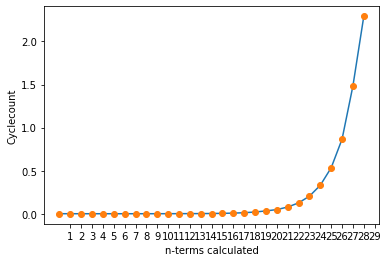

In [33]:
import matplotlib.pyplot as plt

x_axis = [x for x in range(len(nCount))]
plt.plot(x_axis,nTime)
plt.errorbar(x_axis, nTime,
             yerr = err_n,
             fmt ='o')
plt.xticks(np.arange(1, 30, step=1))
plt.ylabel('Cyclecount')
plt.xlabel('n-terms calculated')
plt.show()

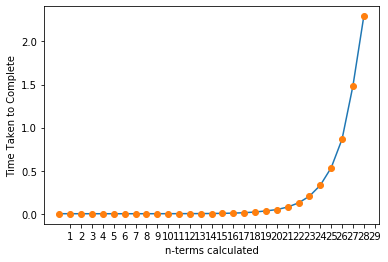

In [34]:
import matplotlib.pyplot as plt

x_axis = [x for x in range(len(nTime))]
plt.plot(x_axis,nTime)
plt.errorbar(x_axis, nTime,
             yerr = err_n,
             fmt ='o')
plt.xticks(np.arange(1, 30, step=1))
plt.ylabel('Time Taken to Complete')
plt.xlabel('n-terms calculated')
plt.show()

## Conclusion
For this Assignment, the implementation was straight forward. I followed the assignment specs and intialized timers and counters before running the fibonacci series and then captured the values after the fibonacci calculation was over. This way, I was able to subtract the values and calulate how long it took to run the calculation and what the total counters was.  Afterwards, I reused that code to run the same calculation on n-terms.  Specifically, I used a loop to run through values 1-30 and calculate the fibonacci series. I used 2 arrays/lists to store the cyclecount and time used for each value in range 1-30.  Then I used these arrays/lists to plot the graphs.  For the standard deviation, I ran the fibonnaci series on values 5, 10, 15, 20, 25, 30 and manually averaged for the runs each. Then in the jupyter notebook I calculated the standard deviation.

An issue I came across for this assignment had to do with the set up in parts A3.0 and A3.1.  For some reason I couldn't call the Make function without getting an error.  I eventually got this to work by trial and error and not changing anything in the code.  Afterwards, I got stuck creating the shared library.  I was able to run the gcc commands, but when calling the functions with ctype, I was getting an issue with the "symbol" not defined in my shared library.  Eventually I asked for help and found out I needed to make a small modification to the Make file and got my code to run. 